# Anharmonic LMG model

Model Hamiltonian

$$\hat H_{\xi,\alpha} = (1-\xi) (S + \hat S_z) + \frac{\alpha}{2S} (S + \hat S_z)(S + \hat S_z + 1) + \frac{2\xi}{S} (S^2 - \hat S_x^2)$$

$N = 2S$ Separate diagonalization into two blocks, for states with *plus* and *minus* parity.

## Libraries and functions

In [1]:
import numpy as np

In [2]:
from matplotlib import pyplot as plt

In [3]:
pwd

'/home/curro/NextCloud_CEAFMC/Programs/U2_Lipkin_git/python/Anh_LMG'

In [4]:
from basic_functions_LMG import eigsystem_LMG_Ham, Corr_Energy_Diagram

In [43]:
#from anh_LMG import Expected_n
%run anh_LMG.py

In [6]:
import pickle

In [7]:
def save_obj(obj, name ):
    with open('./'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.DEFAULT_PROTOCOL)

def load_obj(name ):
    with open('./' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

## System Parameters

- Sval : Total spin $S$
- xi   : Control parameter $\xi\in[0,1]$
- alpha: Anharmonicity

In [7]:
Sval = 20

In [8]:
xi = 0.65

In [9]:
alpha = 0.2

## Correlation energy diagram 

In [10]:
# Energy levels
avals_U1, avecs_U1 = eigsystem_LMG_Ham(Sval, xi, alpha = -alpha, Basis="U1", parity=False, option = "I")
print(avals_U1)

[ 4.75902369  4.75902369  7.18923782  7.18923782  9.49347729  9.49347729
 11.67146832 11.67146832 13.7228392  13.7228392  15.64707347 15.64707347
 17.44343339 17.44343339 19.1108288  19.1108288  20.6475774  20.64757743
 22.05092712 22.05092883 23.31593984 23.3160243  24.43123787 24.4340651
 25.34675072 25.39991189 25.98491992 26.27165862 26.72456188 27.16949455
 27.64158693 28.12299883 28.60970648 29.09595982 29.57635326 30.04493635
 30.49458726 30.91709274 31.29324258 31.64196957 31.79522676]


In [11]:
# Energy levels
avals_plus_U1, avecs_plus_U1, avals_minus_U1, avecs_minus_U1 = eigsystem_LMG_Ham(Sval, xi, alpha = alpha, Basis="U1", parity=True, option = "I")
print(avals_plus_U1)
print(avals_minus_U1)

[ 8.02153045 10.59136189 13.01575179 15.29202855 17.41652946 19.38405153
 21.18682787 22.81234773 24.23680155 25.36930207 26.1109414  27.17589733
 28.60564133 30.28198662 32.17954058 34.28644362 36.59565307 39.10259546
 41.80413116 44.69801993 47.78261661]
[ 8.02153045 10.59136189 13.01575179 15.29202855 17.41652946 19.38405153
 21.18682789 22.81235724 24.23833506 25.44118833 26.55334508 27.85661382
 29.4151049  31.20401049 33.2073392  35.41608814 37.82462969 40.42919592
 43.22714559 46.21656497]


# Correlation Energy Diagrams

In [12]:
Sval = 40
ximin = 0.0
ximax = 1.0
alpha = -0.4
points = 80

Text(0, 0.5, 'Normalized Excitation Energy')

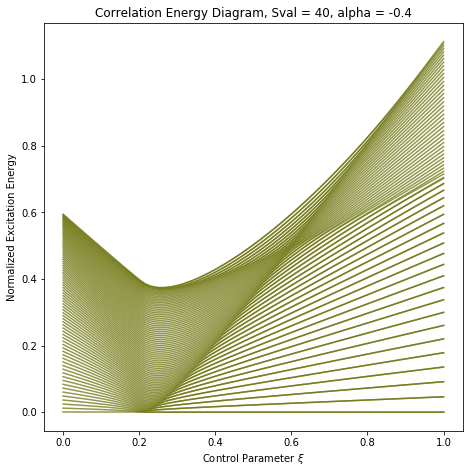

In [14]:
# Both parities
xivals, energies = Corr_Energy_Diagram(Sval, ximin, ximax, points, alpha = alpha, Excitation = True, option="I")
#
fig, ax = plt.subplots(figsize=(7.5,7.5))
for state in range(2*Sval + 1):
    ax.plot(xivals, energies[state,:]/(2*Sval), alpha = 0.75, color = "xkcd:olive")
ax.set_title("Correlation Energy Diagram, Both parities, Sval = {0}, alpha = {1}".format(Sval, alpha))
ax.set_xlabel("Control Parameter $\\xi$")
ax.set_ylabel("Normalized Excitation Energy")

In [15]:
# Positive and negative parity levels
xivals, energies_plus, energies_minus = Corr_Energy_Diagram(Sval, ximin, ximax, points, alpha = alpha, Basis = "U1", parity = True, Excitation = True, option = "I")

Text(0, 0.5, 'Normalized Excitation Energy')

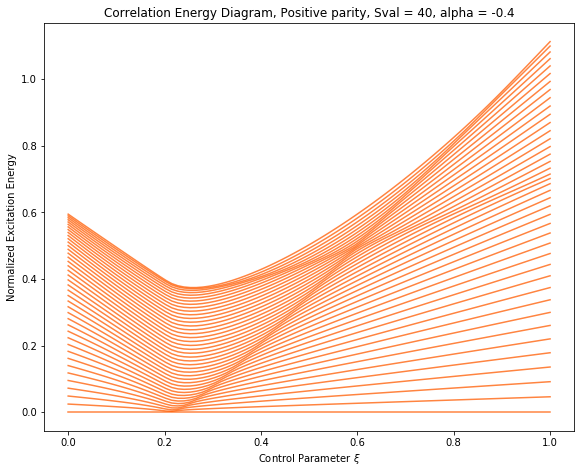

In [20]:
# Positive parity
fig, ax = plt.subplots(figsize=(9.5,7.5))
for state in range(Sval + 1):
    ax.plot(xivals, energies_plus[state,:]/(2*Sval), alpha = 0.75, color = "xkcd:bright orange")
ax.set_title("Correlation Energy Diagram, Positive parity, Sval = {0}, alpha = {1}".format(Sval, alpha))
ax.set_xlabel("Control Parameter $\\xi$")
ax.set_ylabel("Normalized Excitation Energy")

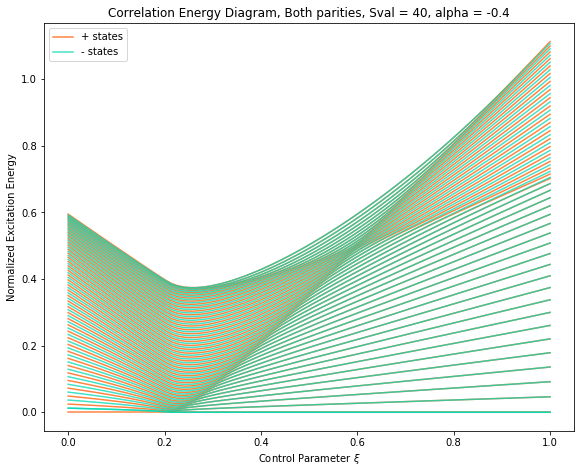

In [21]:
fig, ax = plt.subplots(figsize=(9.5,7.5))
ax.plot(xivals, energies_plus[0,:]/(2*Sval), alpha = 0.75, color = "xkcd:bright orange", label="+ states")
for state in range(1, Sval + 1):
    ax.plot(xivals, energies_plus[state,:]/(2*Sval), alpha = 0.75, color = "xkcd:bright orange")
#
ax.plot(xivals, energies_minus[0,:]/(2*Sval), alpha = 0.75, color = "xkcd:aquamarine", label="- states")
for state in range(Sval):
    ax.plot(xivals, energies_minus[state,:]/(2*Sval), alpha = 0.75, color = "xkcd:aquamarine")
ax.set_title("Correlation Energy Diagram, Both parities, Sval = {0}, alpha = {1}".format(Sval, alpha))
ax.set_xlabel("Control Parameter $\\xi$")
ax.set_ylabel("Normalized Excitation Energy")
ax.legend()

# Adjacent Levels Energy Gap S = 40

In [32]:
Sval = 40
xi = 0.6
alphas = [0.0,-0.25,-0.4,-0.5]
E_alphas_plus = []
E_alphas_minus = []

In [33]:
for alpha_val in alphas:
    # Energy levels
    avals_plus_U1, avals_minus_U1 = eigsystem_LMG_Ham(Sval, xi, alpha = alpha_val, Basis="U1", parity=True, option = "I", avecs=False)
    E_alphas_plus.append(avals_plus_U1)
    E_alphas_minus.append(avals_minus_U1)

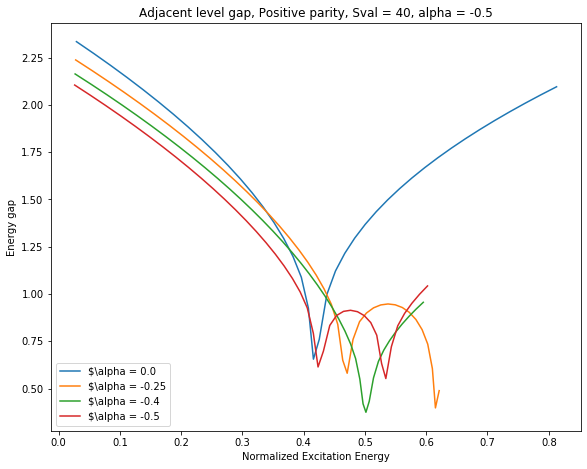

In [35]:
fig, ax = plt.subplots(figsize=(9.5,7.5))
for index, alpha_val in enumerate(alphas):
    #
    Eplus = E_alphas_plus[index]
    delta_Eplus = Eplus[1:]-Eplus[:-1]
    ax.plot((Eplus[1:]-Eplus[0])/(2*Sval), delta_Eplus, alpha = 1, label="$\\alpha = {0}".format(alpha_val))
ax.set_title("Adjacent level gap, Positive parity, Sval = {0}, alpha = {1}".format(Sval, alpha_val))
ax.set_ylabel("Energy gap")
ax.set_xlabel("Normalized Excitation Energy")
ax.legend()

## Adjacent Levels Energy Gap S = 400

In [36]:
Sval = 400
xi = 0.6
alphas = [0.0,-0.25,-0.4,-0.5]
E_alphas_plus = []
E_alphas_minus = []

In [37]:
for alpha_val in alphas:
    # Energy levels
    avals_plus_U1, avals_minus_U1 = eigsystem_LMG_Ham(Sval, xi, alpha = alpha_val, Basis="U1", parity=True, option = "I", avecs=False)
    E_alphas_plus.append(avals_plus_U1)
    E_alphas_minus.append(avals_minus_U1)

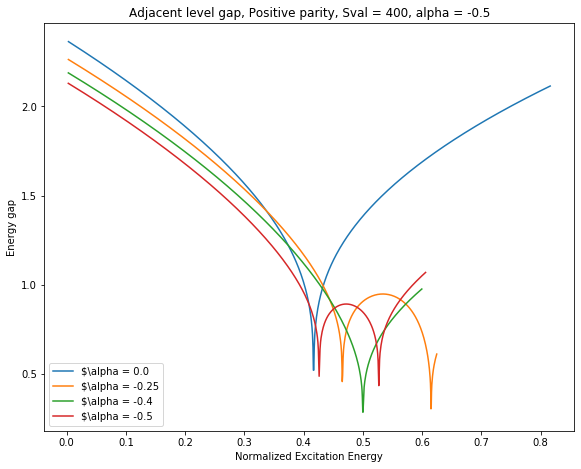

In [38]:
fig, ax = plt.subplots(figsize=(9.5,7.5))
for index, alpha_val in enumerate(alphas):
    #
    Eplus = E_alphas_plus[index]
    delta_Eplus = Eplus[1:]-Eplus[:-1]
    ax.plot((Eplus[1:]-Eplus[0])/(2*Sval), delta_Eplus, alpha = 1, label="$\\alpha = {0}".format(alpha_val))
ax.set_title("Adjacent level gap, Positive parity, Sval = {0}, alpha = {1}".format(Sval, alpha_val))
ax.set_ylabel("Energy gap")
ax.set_xlabel("Normalized Excitation Energy")
ax.legend()

# Expected value of n 

## S = 40

In [8]:
Sval = 40
xi = 0.6
alpha = 0

In [28]:
alphas = [0.0, -0.25, -0.4, -0.5]
avalavecs_nopar = []
avalavecs_plus = []
avalavecs_minus = []
expectation_n_all = []
expectation_n_plus = []
expectation_n_minus = []
for alpha_val in alphas:
    # Energy levels and avecs NO PARITY
    avals_U1, avecs_U1 = eigsystem_LMG_Ham(Sval, xi, alpha = alpha_val, Basis="U1", parity=False, option = "I")
    expectation_n_all.append(Expected_n(Sval, avecs_U1))
    avalavecs_nopar.append([avals_U1, avecs_U1])
    # Energy levels and avecs TRUE PARITY
    avals_plus_U1, avecs_plus_U1, avals_minus_U1, avecs_minus_U1 = eigsystem_LMG_Ham(Sval, xi, alpha = alpha_val, Basis="U1", parity=True, option = "I", avecs=True)
    expectation_n_plus.append(Expected_n_parity(Sval, avecs_plus_U1, parity="Plus"))
    expectation_n_minus.append(Expected_n_parity(Sval, avecs_minus_U1, parity="Minus"))
    avalavecs_plus.append([avals_plus_U1, avecs_plus_U1])
    avalavecs_minus.append([avals_minus_U1, avecs_minus_U1])
   

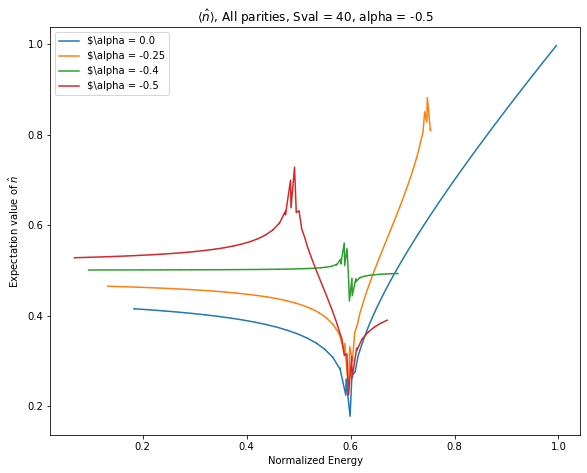

In [30]:
fig, ax = plt.subplots(figsize=(9.5,7.5))
for index, alpha_val in enumerate(alphas):
    #
    norm_energy = (avalavecs_nopar[index][0])/(2*Sval)
    norm_exp_n = expectation_n_all[index]/(2*Sval)
    ax.plot(norm_energy, norm_exp_n, alpha = 1, label="$\\alpha = {0}".format(alpha_val))
ax.set_title("$\\langle \\hat n\\rangle$, All parities, Sval = {0}, alpha = {1}".format(Sval, alpha_val))
ax.set_ylabel("Expectation value of $\\hat n$")
ax.set_xlabel("Normalized Energy")
ax.legend()

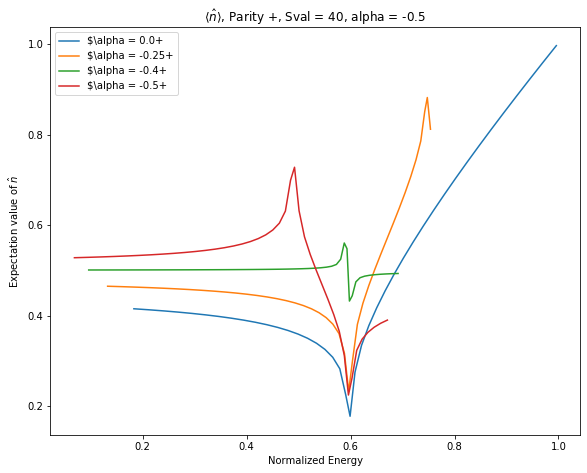

In [31]:
# Positive parity
fig, ax = plt.subplots(figsize=(9.5,7.5))
for index, alpha_val in enumerate(alphas):
    #
    norm_energy = (avalavecs_plus[index][0])/(2*Sval)
    norm_exp_n = expectation_n_plus[index]/(2*Sval)
    ax.plot(norm_energy, norm_exp_n, alpha = 1, label="$\\alpha = {0}+".format(alpha_val))
ax.set_title("$\\langle \\hat n\\rangle$, Parity +, Sval = {0}, alpha = {1}".format(Sval, alpha_val))
ax.set_ylabel("Expectation value of $\\hat n$")
ax.set_xlabel("Normalized Energy")
ax.legend()

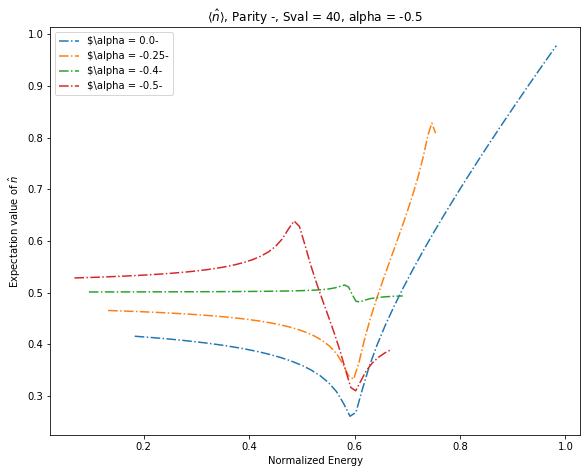

In [34]:
# Negative parity
fig, ax = plt.subplots(figsize=(9.5,7.5))
for index, alpha_val in enumerate(alphas):
    #
    norm_energy = (avalavecs_minus[index][0])/(2*Sval)
    norm_exp_n = expectation_n_minus[index]/(2*Sval)
    ax.plot(norm_energy, norm_exp_n, alpha = 1, ls="-.", label="$\\alpha = {0}-".format(alpha_val))
ax.set_title("$\\langle \\hat n\\rangle$, Parity -, Sval = {0}, alpha = {1}".format(Sval, alpha_val))
ax.set_ylabel("Expectation value of $\\hat n$")
ax.set_xlabel("Normalized Energy")
ax.legend()

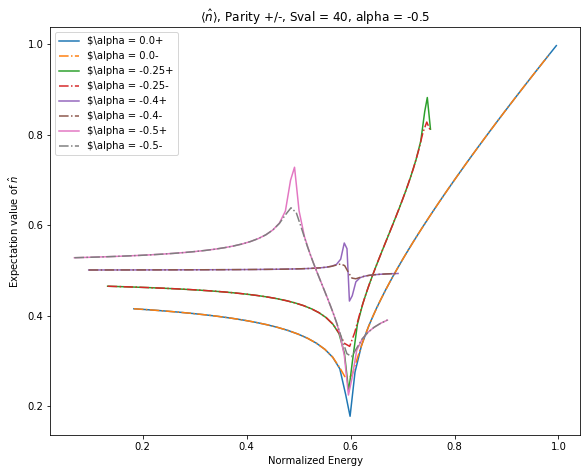

In [35]:
# Positive and negative parity
fig, ax = plt.subplots(figsize=(9.5,7.5))
for index, alpha_val in enumerate(alphas):
    #
    norm_energy = (avalavecs_plus[index][0])/(2*Sval)
    norm_exp_n = expectation_n_plus[index]/(2*Sval)
    ax.plot(norm_energy, norm_exp_n, alpha = 1, label="$\\alpha = {0}+".format(alpha_val))
    #
    norm_energy = (avalavecs_minus[index][0])/(2*Sval)
    norm_exp_n = expectation_n_minus[index]/(2*Sval)
    ax.plot(norm_energy, norm_exp_n, alpha = 1, ls="-.", label="$\\alpha = {0}-".format(alpha_val))
ax.set_title("$\\langle \\hat n\\rangle$, Parity +/-, Sval = {0}, alpha = {1}".format(Sval, alpha_val))
ax.set_ylabel("Expectation value of $\\hat n$")
ax.set_xlabel("Normalized Energy")
ax.legend()

## S = 400

In [36]:
Sval = 400
xi = 0.6
alpha = 0

In [37]:
alphas = [0.0, -0.25, -0.4, -0.5]
avalavecs_nopar = []
avalavecs_plus = []
avalavecs_minus = []
expectation_n_all = []
expectation_n_plus = []
expectation_n_minus = []
for alpha_val in alphas:
    # Energy levels and avecs NO PARITY
    avals_U1, avecs_U1 = eigsystem_LMG_Ham(Sval, xi, alpha = alpha_val, Basis="U1", parity=False, option = "I")
    expectation_n_all.append(Expected_n(Sval, avecs_U1))
    avalavecs_nopar.append([avals_U1, avecs_U1])
    # Energy levels and avecs TRUE PARITY
    avals_plus_U1, avecs_plus_U1, avals_minus_U1, avecs_minus_U1 = eigsystem_LMG_Ham(Sval, xi, alpha = alpha_val, Basis="U1", parity=True, option = "I", avecs=True)
    expectation_n_plus.append(Expected_n_parity(Sval, avecs_plus_U1, parity="Plus"))
    expectation_n_minus.append(Expected_n_parity(Sval, avecs_minus_U1, parity="Minus"))
    avalavecs_plus.append([avals_plus_U1, avecs_plus_U1])
    avalavecs_minus.append([avals_minus_U1, avecs_minus_U1])
   

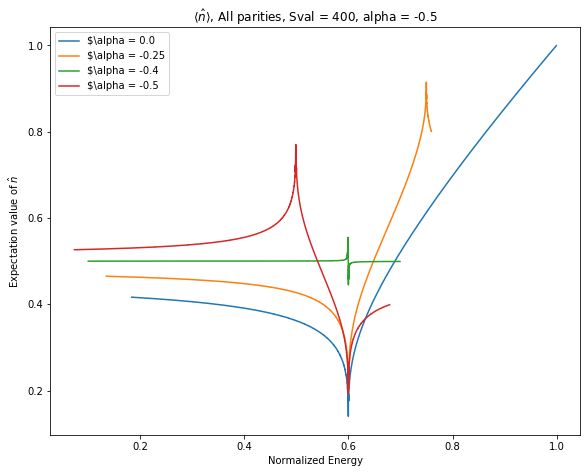

In [38]:
fig, ax = plt.subplots(figsize=(9.5,7.5))
for index, alpha_val in enumerate(alphas):
    #
    norm_energy = (avalavecs_nopar[index][0])/(2*Sval)
    norm_exp_n = expectation_n_all[index]/(2*Sval)
    ax.plot(norm_energy, norm_exp_n, alpha = 1, label="$\\alpha = {0}".format(alpha_val))
ax.set_title("$\\langle \\hat n\\rangle$, All parities, Sval = {0}, alpha = {1}".format(Sval, alpha_val))
ax.set_ylabel("Expectation value of $\\hat n$")
ax.set_xlabel("Normalized Energy")
ax.legend()

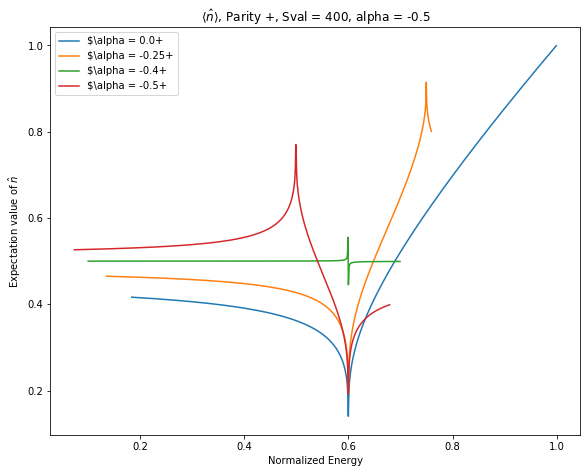

In [39]:
# Positive parity
fig, ax = plt.subplots(figsize=(9.5,7.5))
for index, alpha_val in enumerate(alphas):
    #
    norm_energy = (avalavecs_plus[index][0])/(2*Sval)
    norm_exp_n = expectation_n_plus[index]/(2*Sval)
    ax.plot(norm_energy, norm_exp_n, alpha = 1, label="$\\alpha = {0}+".format(alpha_val))
ax.set_title("$\\langle \\hat n\\rangle$, Parity +, Sval = {0}, alpha = {1}".format(Sval, alpha_val))
ax.set_ylabel("Expectation value of $\\hat n$")
ax.set_xlabel("Normalized Energy")
ax.legend()

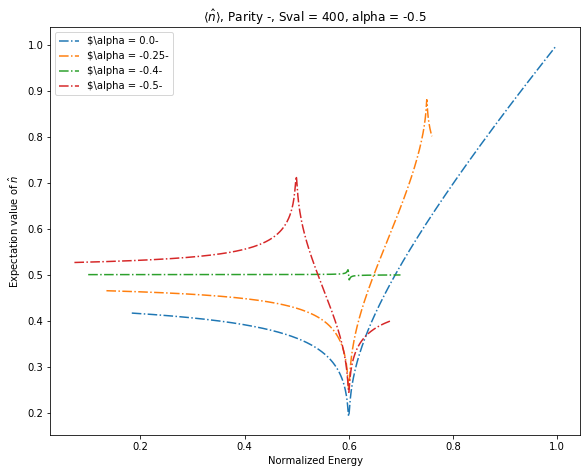

In [40]:
# Negative parity
fig, ax = plt.subplots(figsize=(9.5,7.5))
for index, alpha_val in enumerate(alphas):
    #
    norm_energy = (avalavecs_minus[index][0])/(2*Sval)
    norm_exp_n = expectation_n_minus[index]/(2*Sval)
    ax.plot(norm_energy, norm_exp_n, alpha = 1, ls="-.", label="$\\alpha = {0}-".format(alpha_val))
ax.set_title("$\\langle \\hat n\\rangle$, Parity -, Sval = {0}, alpha = {1}".format(Sval, alpha_val))
ax.set_ylabel("Expectation value of $\\hat n$")
ax.set_xlabel("Normalized Energy")
ax.legend()

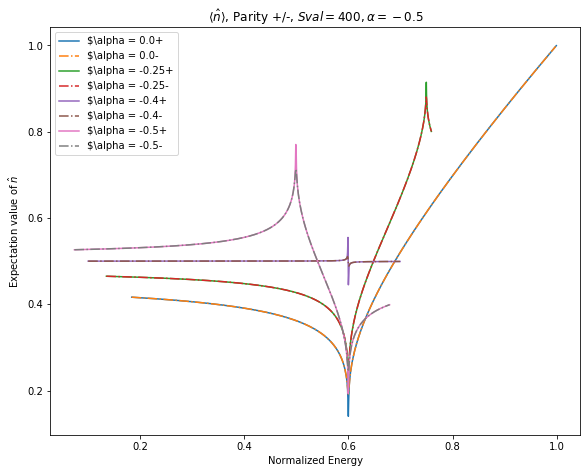

In [42]:
# Positive and negative parity
fig, ax = plt.subplots(figsize=(9.5,7.5))
for index, alpha_val in enumerate(alphas):
    #
    norm_energy = (avalavecs_plus[index][0])/(2*Sval)
    norm_exp_n = expectation_n_plus[index]/(2*Sval)
    ax.plot(norm_energy, norm_exp_n, alpha = 1, label="$\\alpha = {0}+".format(alpha_val))
    #
    norm_energy = (avalavecs_minus[index][0])/(2*Sval)
    norm_exp_n = expectation_n_minus[index]/(2*Sval)
    ax.plot(norm_energy, norm_exp_n, alpha = 1, ls="-.", label="$\\alpha = {0}-".format(alpha_val))
ax.set_title("$\\langle \\hat n\\rangle$, Parity +/-, $Sval = {0}, \\alpha = {1}$".format(Sval, alpha_val))
ax.set_ylabel("Expectation value of $\\hat n$")
ax.set_xlabel("Normalized Energy")
ax.legend()

# Participation Ratio

## S = 40

In [8]:
Sval = 40
xi = 0.6

In [44]:
alphas = [0.0, -0.25, -0.4, -0.5]
avalavecs_nopar = []
avalavecs_plus = []
avalavecs_minus = []
IPR_all = []
IPR_plus = []
IPR_minus = []
for alpha_val in alphas:
    # Energy levels and avecs NO PARITY
    avals_U1, avecs_U1 = eigsystem_LMG_Ham(Sval, xi, alpha = alpha_val, Basis="U1", parity=False, option = "I")
    IPR_all.append(IPR(avecs_U1))
    avalavecs_nopar.append([avals_U1, avecs_U1])
    # Energy levels and avecs TRUE PARITY
    avals_plus_U1, avecs_plus_U1, avals_minus_U1, avecs_minus_U1 = eigsystem_LMG_Ham(Sval, xi, alpha = alpha_val, Basis="U1", parity=True, option = "I", avecs=True)
    IPR_plus.append(IPR(avecs_plus_U1))
    IPR_minus.append(IPR(avecs_minus_U1))
    avalavecs_plus.append([avals_plus_U1, avecs_plus_U1])
    avalavecs_minus.append([avals_minus_U1, avecs_minus_U1])
   

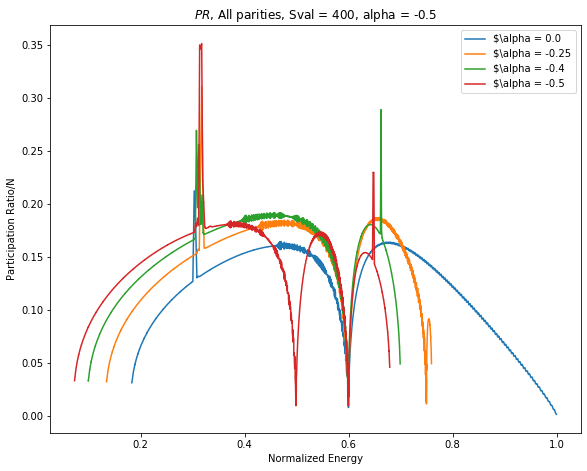

In [50]:
fig, ax = plt.subplots(figsize=(9.5,7.5))
for index, alpha_val in enumerate(alphas):
    #
    norm_energy = (avalavecs_nopar[index][0])/(2*Sval)
    norm_IPR = IPR_all[index]/(2*Sval)
    ax.plot(norm_energy, norm_IPR, alpha = 1, label="$\\alpha = {0}".format(alpha_val))
ax.set_title("$PR$, All parities, Sval = {0}, alpha = {1}".format(Sval, alpha_val))
ax.set_ylabel("Participation Ratio/N")
ax.set_xlabel("Normalized Energy")
ax.legend()

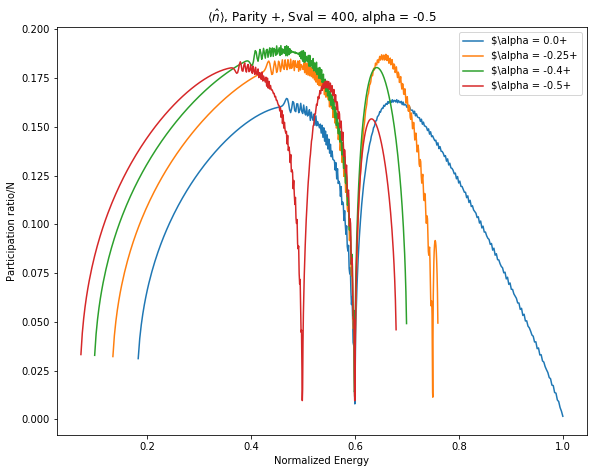

In [49]:
# Positive parity
fig, ax = plt.subplots(figsize=(9.5,7.5))
for index, alpha_val in enumerate(alphas):
    #
    norm_energy = (avalavecs_plus[index][0])/(2*Sval)
    norm_IPR = IPR_plus[index]/(2*Sval)
    ax.plot(norm_energy, norm_IPR, alpha = 1, label="$\\alpha = {0}+".format(alpha_val))
ax.set_title("$\\langle \\hat n\\rangle$, Parity +, Sval = {0}, alpha = {1}".format(Sval, alpha_val))
ax.set_ylabel("Participation ratio/N")
ax.set_xlabel("Normalized Energy")
ax.legend()

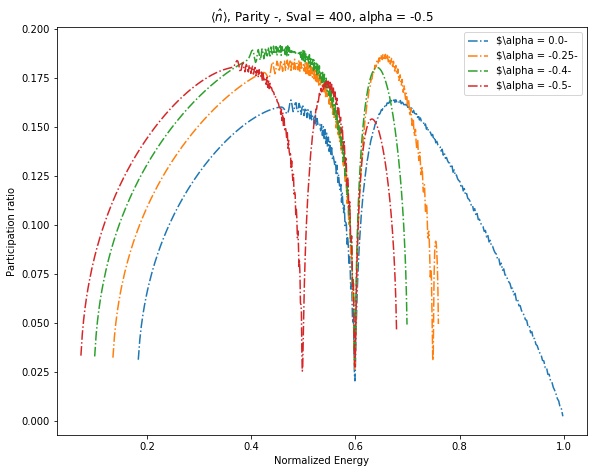

In [47]:
# Negative parity
fig, ax = plt.subplots(figsize=(9.5,7.5))
for index, alpha_val in enumerate(alphas):
    #
    norm_energy = (avalavecs_minus[index][0])/(2*Sval)
    norm_IPR = IPR_minus[index]/(2*Sval)
    ax.plot(norm_energy, norm_IPR, alpha = 1, ls="-.", label="$\\alpha = {0}-".format(alpha_val))
ax.set_title("$\\langle \\hat n\\rangle$, Parity -, Sval = {0}, alpha = {1}".format(Sval, alpha_val))
ax.set_ylabel("Participation ratio")
ax.set_xlabel("Normalized Energy")
ax.legend()

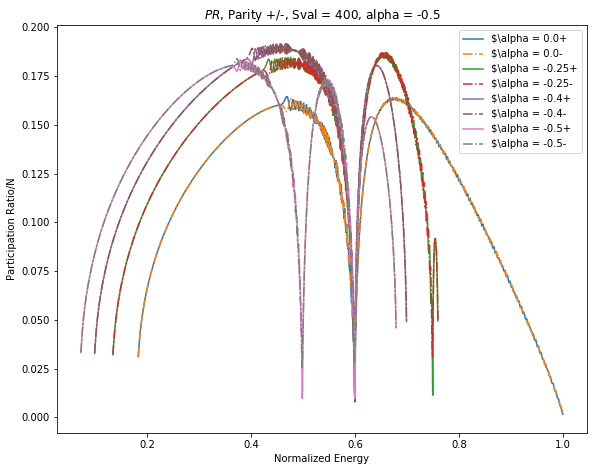

In [48]:
# Positive and negative parity
fig, ax = plt.subplots(figsize=(9.5,7.5))
for index, alpha_val in enumerate(alphas):
    #
    norm_energy = (avalavecs_plus[index][0])/(2*Sval)
    norm_IPR = IPR_plus[index]/(2*Sval)
    ax.plot(norm_energy, norm_IPR, alpha = 1, label="$\\alpha = {0}+".format(alpha_val))
    #
    norm_energy = (avalavecs_minus[index][0])/(2*Sval)
    norm_IPR = IPR_minus[index]/(2*Sval)
    ax.plot(norm_energy, norm_IPR, alpha = 1, ls="-.", label="$\\alpha = {0}-".format(alpha_val))
ax.set_title("$PR$, Parity +/-, Sval = {0}, alpha = {1}".format(Sval, alpha_val))
ax.set_ylabel("Participation Ratio/N")
ax.set_xlabel("Normalized Energy")
ax.legend()

## S = 400

In [51]:
Sval = 400
xi = 0.6

In [52]:
alphas = [0.0, -0.25, -0.4, -0.5]
avalavecs_nopar = []
avalavecs_plus = []
avalavecs_minus = []
IPR_all = []
IPR_plus = []
IPR_minus = []
for alpha_val in alphas:
    # Energy levels and avecs NO PARITY
    avals_U1, avecs_U1 = eigsystem_LMG_Ham(Sval, xi, alpha = alpha_val, Basis="U1", parity=False, option = "I")
    IPR_all.append(IPR(avecs_U1))
    avalavecs_nopar.append([avals_U1, avecs_U1])
    # Energy levels and avecs TRUE PARITY
    avals_plus_U1, avecs_plus_U1, avals_minus_U1, avecs_minus_U1 = eigsystem_LMG_Ham(Sval, xi, alpha = alpha_val, Basis="U1", parity=True, option = "I", avecs=True)
    IPR_plus.append(IPR(avecs_plus_U1))
    IPR_minus.append(IPR(avecs_minus_U1))
    avalavecs_plus.append([avals_plus_U1, avecs_plus_U1])
    avalavecs_minus.append([avals_minus_U1, avecs_minus_U1])
   

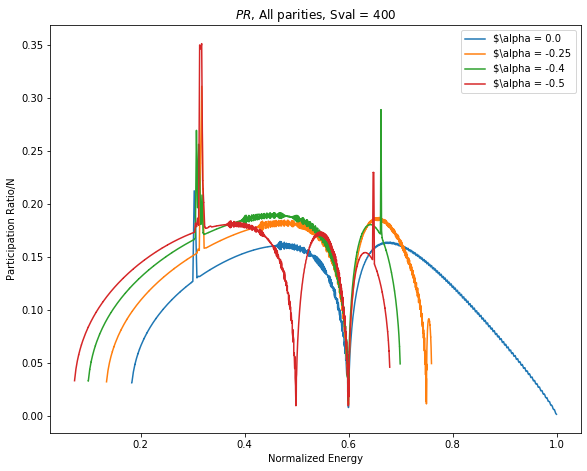

In [59]:
fig, ax = plt.subplots(figsize=(9.5,7.5))
for index, alpha_val in enumerate(alphas):
    #
    norm_energy = (avalavecs_nopar[index][0])/(2*Sval)
    norm_IPR = IPR_all[index]/(2*Sval)
    ax.plot(norm_energy, norm_IPR, alpha = 1, label="$\\alpha = {0}".format(alpha_val))
ax.set_title("$PR$, All parities, Sval = {0}".format(Sval))
ax.set_ylabel("Participation Ratio/N")
ax.set_xlabel("Normalized Energy")
ax.legend()

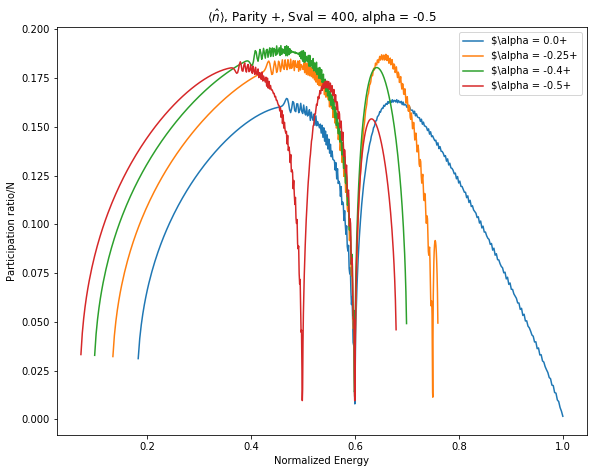

In [54]:
# Positive parity
fig, ax = plt.subplots(figsize=(9.5,7.5))
for index, alpha_val in enumerate(alphas):
    #
    norm_energy = (avalavecs_plus[index][0])/(2*Sval)
    norm_IPR = IPR_plus[index]/(2*Sval)
    ax.plot(norm_energy, norm_IPR, alpha = 1, label="$\\alpha = {0}+".format(alpha_val))
ax.set_title("$\\langle \\hat n\\rangle$, Parity +, Sval = {0}".format(Sval))
ax.set_ylabel("Participation ratio/N")
ax.set_xlabel("Normalized Energy")
ax.legend()

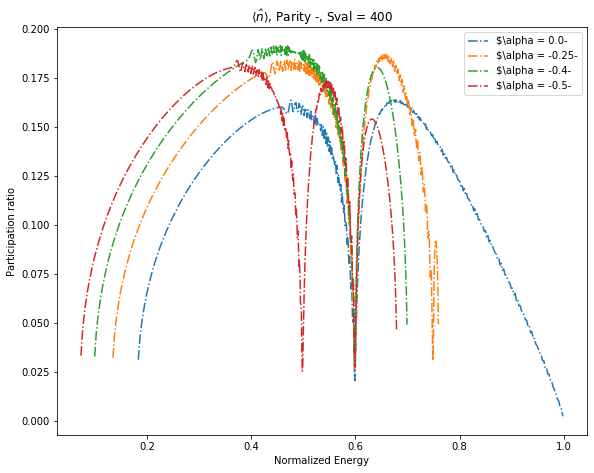

In [58]:
# Negative parity
fig, ax = plt.subplots(figsize=(9.5,7.5))
for index, alpha_val in enumerate(alphas):
    #
    norm_energy = (avalavecs_minus[index][0])/(2*Sval)
    norm_IPR = IPR_minus[index]/(2*Sval)
    ax.plot(norm_energy, norm_IPR, alpha = 1, ls="-.", label="$\\alpha = {0}-".format(alpha_val))
ax.set_title("$\\langle \\hat n\\rangle$, Parity -, Sval = {0}".format(Sval))
ax.set_ylabel("Participation ratio")
ax.set_xlabel("Normalized Energy")
ax.legend()

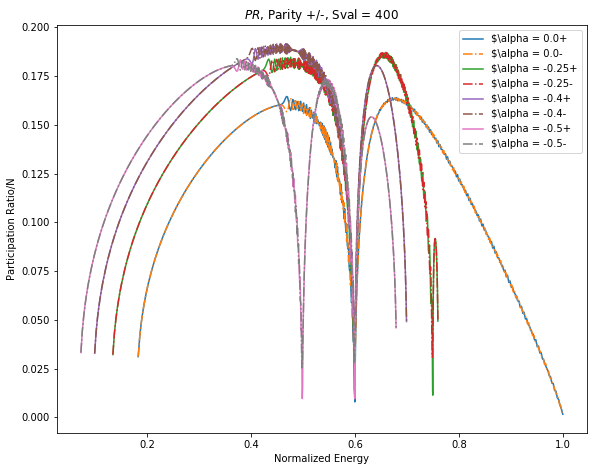

In [57]:
# Positive and negative parity
fig, ax = plt.subplots(figsize=(9.5,7.5))
for index, alpha_val in enumerate(alphas):
    #
    norm_energy = (avalavecs_plus[index][0])/(2*Sval)
    norm_IPR = IPR_plus[index]/(2*Sval)
    ax.plot(norm_energy, norm_IPR, alpha = 1, label="$\\alpha = {0}+".format(alpha_val))
    #
    norm_energy = (avalavecs_minus[index][0])/(2*Sval)
    norm_IPR = IPR_minus[index]/(2*Sval)
    ax.plot(norm_energy, norm_IPR, alpha = 1, ls="-.", label="$\\alpha = {0}-".format(alpha_val))
ax.set_title("$PR$, Parity +/-, Sval = {0}".format(Sval))
ax.set_ylabel("Participation Ratio/N")
ax.set_xlabel("Normalized Energy")
ax.legend()